In [ ]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator , img_to_array, load_img
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Testing Old Models 

In [ ]:
IMAGE_HEIGHT_WIDTH = 350
train = ImageDataGenerator(rescale = 1./255)
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Projects/GP Project/Dataset/croppedDataset/trainSet',
                                          target_size = (IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH),
                                          batch_size = 32,
                                          class_mode = "categorical")

Found 140 images belonging to 7 classes.


In [ ]:
train_dataset.class_indices
my_dic = dict(train_dataset.class_indices)
my_dic

{'bed': 0,
 'father': 1,
 'full': 2,
 'police': 3,
 'shirt': 4,
 'water': 5,
 'wrong': 6}

In [ ]:
dir_path = "/content/drive/MyDrive/Projects/GP Project/Dataset/croppedDataset/newTest"
dic = list(train_dataset.class_indices)
myarr = []
from PIL import Image

# my_image = load_img("/content/drive/MyDrive/Projects/GP Project/Dataset/croppedDatasetV2/new_testSet/drink_1.jpg")
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '/' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    name = i
    name = name.split("_")[0]
    
    myarr.append(my_dic.get(name))
    # print(name)

print(myarr)

[3, 3, 3, 2, 2, 4, 4, 6, 6, 5, 5, 5, 6, 4, 5, 2, 3, 4, 4, 3, 2, 2, 6, 5, 6, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model

model = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_1/vgg16_1.h5")

out_predicitons10 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    # plt.title(i)
    # plt.imshow(my_image)
    # plt.show()
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model.predict(my_image).argmax()
    out_predicitons10.append(prediction)

    dic = list(train_dataset.class_indices)
    # print(dic[prediction])

print(confusion_matrix(myarr, out_predicitons10))
print(classification_report(myarr, out_predicitons10))

1/1 [==============================] - 2s 2s/step
[[5 0 0 0 0 0 0]
 [0 4 0 0 0 1 0]
 [0 0 0 0 5 0 0]
 [0 0 0 3 2 0 0]
 [0 0 0 0 5 0 0]
 [2 0 0 1 0 2 0]
 [0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5
           3       0.75      0.60      0.67         5
           4       0.42      1.00      0.59         5
           5       0.67      0.40      0.50         5
           6       1.00      1.00      1.00         5

    accuracy                           0.69        35
   macro avg       0.65      0.69      0.64        35
weighted avg       0.65      0.69      0.64        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

model = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_1/res50V2_cropped.h5")

out_predicitons11 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    # plt.title(i)
    # plt.imshow(my_image)
    # plt.show()
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model.predict(my_image).argmax()
    out_predicitons11.append(prediction)

    dic = list(train_dataset.class_indices)
    #print(dic[prediction])

print(confusion_matrix(myarr, out_predicitons11))
print(classification_report(myarr, out_predicitons11))

1/1 [==============================] - 0s 21ms/step
[[0 0 0 0 0 3 2]
 [0 0 0 2 0 2 1]
 [0 0 0 0 3 0 2]
 [0 0 0 0 0 2 3]
 [0 0 0 1 1 0 3]
 [0 0 0 1 0 4 0]
 [0 0 0 1 0 0 4]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.25      0.20      0.22         5
           5       0.36      0.80      0.50         5
           6       0.27      0.80      0.40         5

    accuracy                           0.26        35
   macro avg       0.13      0.26      0.16        35
weighted avg       0.13      0.26      0.16        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_1/mobileV2_cropped.h5")

out_predicitons12 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    # plt.title(i)
    # plt.imshow(my_image)
    # plt.show()
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model.predict(my_image).argmax()
    out_predicitons12.append(prediction)

    dic = list(train_dataset.class_indices)
    #print(dic[prediction])

print(confusion_matrix(myarr, out_predicitons12))
print(classification_report(myarr, out_predicitons12))

1/1 [==============================] - 0s 23ms/step
[[4 1 0 0 0 0 0]
 [0 2 0 0 0 3 0]
 [0 0 5 0 0 0 0]
 [0 0 0 4 1 0 0]
 [0 0 5 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 0 0 0 0 5]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.25      0.40      0.31         5
           2       0.50      1.00      0.67         5
           3       1.00      0.80      0.89         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00         5

    accuracy                           0.57        35
   macro avg       0.54      0.57      0.54        35
weighted avg       0.54      0.57      0.54        35



In [ ]:


model = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_1/inceptionV3_cropped.h5")

out_predicitons13 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    # plt.title(i)
    # plt.imshow(my_image)
    # plt.show()
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model.predict(my_image).argmax()
    out_predicitons13.append(prediction)

    dic = list(train_dataset.class_indices)
    #print(dic[prediction])

print(confusion_matrix(myarr, out_predicitons13))
print(classification_report(myarr, out_predicitons13))

1/1 [==============================] - 0s 25ms/step
[[0 0 0 4 0 0 1]
 [2 0 0 3 0 0 0]
 [3 1 0 1 0 0 0]
 [3 1 0 1 0 0 0]
 [5 0 0 0 0 0 0]
 [3 0 0 2 0 0 0]
 [4 0 0 1 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.08      0.20      0.12         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5

    accuracy                           0.03        35
   macro avg       0.01      0.03      0.02        35
weighted avg       0.01      0.03      0.02        35



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


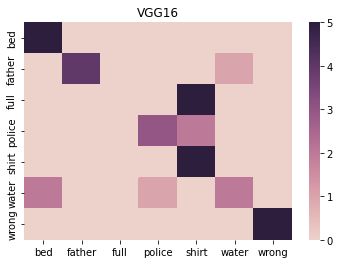

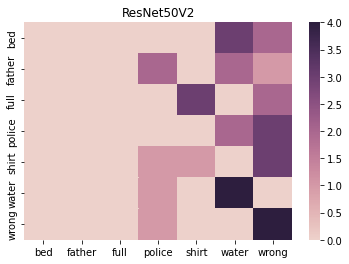

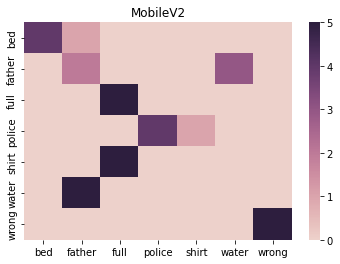

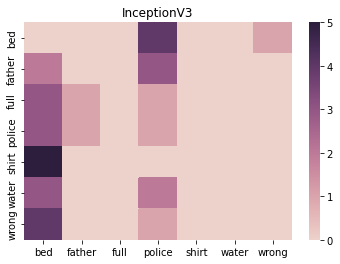

In [ ]:
import pandas as pd
import seaborn as sns
outputss = [out_predicitons10,out_predicitons11,out_predicitons12,out_predicitons13]

my_titles = ["VGG16","ResNet50V2","MobileV2","InceptionV3"]

for i in range(len(outputss)):
  df = pd.DataFrame(confusion_matrix(myarr, outputss[i]))
  df = df.rename(columns=lambda x: str(dic[x]))
  df = df.rename(index=lambda x: str(dic[x]))
  plt.figure()
  plt.title(my_titles[i])
  sns.heatmap(df,cmap=sns.cubehelix_palette(as_cmap=True))
  plt.show()

Text(0, 0.5, 'F1 Score')

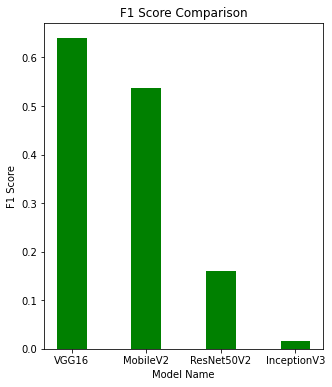

In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
x = []
y = ["VGG16","MobileV2","ResNet50V2","InceptionV3"]

for i in range(len(outputss)):
  x.append(f1_score(myarr, outputss[i], average='macro'))

x.sort(reverse=True)
plt.figure(figsize=(5,6)) 
plt.title("F1 Score Comparison")
plt.bar(y,x,0.4,color = "green")
plt.xlabel("Model Name")
plt.ylabel("F1 Score")

Text(0, 0.5, 'Percentage')

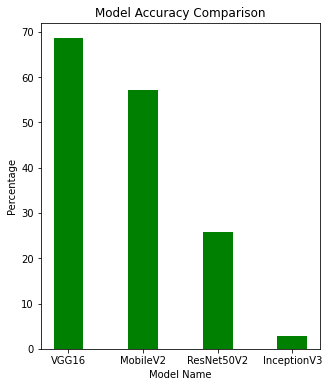

In [ ]:

x = []
y = ["VGG16","MobileV2","ResNet50V2","InceptionV3"]

for i in range(len(outputss)):
  # str(my_titles[i])+" Model Accuracy =\t"+str(accuracy_score(myarr, outputss[i]))
  x.append(accuracy_score(myarr, outputss[i])*100)

x.sort(reverse=True)
plt.figure(figsize=(5,6)) 
plt.title("Model Accuracy Comparison")
plt.bar(y,x,0.4,color = "green")
plt.xlabel("Model Name")
plt.ylabel("Percentage")

# Testing Final Models
 

In [ ]:
IMAGE_HEIGHT_WIDTH = 350
train = ImageDataGenerator(rescale = 1./255)
train_dataset = train.flow_from_directory('/content/drive/MyDrive/Projects/GP Project/Dataset/croppedDatasetV2/trainSet',
                                          target_size = (IMAGE_HEIGHT_WIDTH,IMAGE_HEIGHT_WIDTH),
                                          batch_size = 32,
                                          class_mode = "categorical")

Found 900 images belonging to 15 classes.


In [ ]:
train_dataset.class_indices
my_dic = dict(train_dataset.class_indices)
my_dic

{'drink': 0,
 'food': 1,
 'full': 2,
 'have': 3,
 'hello': 4,
 'i': 5,
 'i love you': 6,
 'police': 7,
 'prefer': 8,
 'shirt': 9,
 'telephone': 10,
 'water': 11,
 'wrong': 12,
 'yes': 13,
 'you': 14}

In [ ]:
# 
dir_path = "/content/drive/MyDrive/Projects/GP Project/Dataset/croppedDatasetV2/new_testSet"
dic = list(train_dataset.class_indices)
myarr = []

for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    name = i
    name = name.split("_")[0]
    
    myarr.append(my_dic.get(name))
    # print(name)

print(myarr)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14]


In [ ]:
from keras.applications.vgg16 import preprocess_input
model = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_2/VGG16_Augmented1.h5")

out_predicitons0 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    # plt.title(i)
    # plt.imshow(my_image)
    # plt.show()
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model.predict(my_image).argmax()
    out_predicitons0.append(prediction)

    dic = list(train_dataset.class_indices)
    #print(dic[prediction])

print(confusion_matrix(myarr, out_predicitons0))
print(classification_report(myarr, out_predicitons0))
# sns.heatmap(confusion_matrix(myarr, out_predicitons0),cmap=sns.cubehelix_palette(as_cmap=True))

1/1 [==============================] - 1s 1s/step
[[5 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 6 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 6 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 4]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       0.

In [ ]:
from keras.applications.vgg16 import preprocess_input

out_predicitons1 = []
model1 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_2/VGG19_Augmented1.h5")
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    # plt.title(i)
    # plt.imshow(my_image)
    # plt.show()
    
    #preprocess the image
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model1.predict(my_image).argmax()
    out_predicitons1.append(prediction)

    dic = list(train_dataset.class_indices)
    #print(dic[prediction])

print(confusion_matrix(myarr, out_predicitons1))
print(classification_report(myarr, out_predicitons1))
# sns.heatmap(confusion_matrix(myarr, out_predicitons1),cmap=sns.cubehelix_palette(as_cmap=True))
# 

1/1 [==============================] - 2s 2s/step
[[6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 4 0 0 0 0 0 0 1 0 0 0]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0 0 0 0 0 2]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 6 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 0 0 4 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 4 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.17      0.29         6
           2       1.00      1.00      1.00         6
           3       1.00      0.67      0.80         6
           4       0.60      1.00      0.75         6
           5       1.00      0.50      0.67         6
           6       1.00      1.00      1.00         6
           7       0.

In [ ]:
model2 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_3/mobileV2_Aug.h5")
out_predicitons2 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model2.predict(my_image).argmax()
    out_predicitons2.append(prediction)

    dic = list(train_dataset.class_indices)
    #print(dic[prediction])

print(confusion_matrix(myarr, out_predicitons2))
print(classification_report(myarr, out_predicitons2))
# sns.heatmap(confusion_matrix(myarr, out_predicitons2),cmap=sns.cubehelix_palette(as_cmap=True));

1/1 [==============================] - 0s 98ms/step
[[0 0 0 0 0 0 0 0 0 0 0 0 0 4 2]
 [0 0 0 1 2 0 0 0 0 0 0 2 0 0 1]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 6]
 [0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 5]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 4]
 [0 0 0 0 2 0 1 0 0 0 0 0 0 0 3]
 [0 0 0 0 0 0 0 0 0 5 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 3]
 [0 0 0 0 0 0 0 0 0 0 0 5 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 4 1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         6
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         6
           4       0.60      1.00      0.75         6
           5       0.00      0.00      0.00         6
           6       0.50      0.50      0.50         6
           7       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model3 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_3/res50V2_Aug.h5")
out_predicitons3 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model3.predict(my_image).argmax()
    out_predicitons3.append(prediction)

    dic = list(train_dataset.class_indices)
    #print(dic[prediction])

print(confusion_matrix(myarr, out_predicitons3))
print(classification_report(myarr, out_predicitons3))
# sns.heatmap(confusion_matrix(myarr, out_predicitons3),cmap=sns.cubehelix_palette(as_cmap=True));

1/1 [==============================] - 0s 388ms/step
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [5 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 5]
 [6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [6 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       0.06      0.67      0.11         6
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model4 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_3/res101V2_Aug.h5")
out_predicitons4 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model4.predict(my_image).argmax()
    out_predicitons4.append(prediction)

    dic = list(train_dataset.class_indices)
   # print(dic[prediction])

print(confusion_matrix(myarr, out_predicitons4))
print(classification_report(myarr, out_predicitons4))
# sns.heatmap(confusion_matrix(myarr, out_predicitons4),cmap=sns.cubehelix_palette(as_cmap=True));

1/1 [==============================] - 1s 731ms/step
[[0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 5 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 6 0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.07      1.00      0.13         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model5 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_3/effcientb7_Aug.h5")
out_predicitons5 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model5.predict(my_image).argmax()
    out_predicitons5.append(prediction)

    dic = list(train_dataset.class_indices)
   # print(dic[prediction])

print(confusion_matrix(myarr, out_predicitons5))
print(classification_report(myarr, out_predicitons5))
# sns.heatmap(confusion_matrix(myarr, out_predicitons5),cmap=sns.cubehelix_palette(as_cmap=True));

1/1 [==============================] - 1s 1s/step
[[0 0 0 0 0 0 0 3 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0]
 [0 0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 4 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 1 0 0 0 0 4 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 5 0]
 [0 0 0 0 0 0 0 2 0 0 0 1 0 3 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 2 0 0 0 0 3 0 1 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 2 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 5 0]
 [0 0 0 0 0 1 0 2 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 3 0 3 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         6
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model6 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_3/effcientV2L_Aug.h5")
out_predicitons6 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model6.predict(my_image).argmax()
    out_predicitons6.append(prediction)

    dic = list(train_dataset.class_indices)
    #print(dic[prediction])

print(confusion_matrix(myarr, out_predicitons6))
print(classification_report(myarr, out_predicitons6))
# sns.heatmap(confusion_matrix(myarr, out_predicitons6),cmap=sns.cubehelix_palette(as_cmap=True));

1/1 [==============================] - 1s 1s/step
[[0 0 0 0 0 0 0 0 0 5 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 3 2 0 0]
 [1 0 0 0 0 0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 2 0 0 2 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 4 1 0 0]
 [0 0 0 0 0 0 0 2 0 2 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 5 1 0 0]
 [0 0 1 0 0 0 0 3 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 4 2 0 0]
 [0 0 0 0 0 0 0 0 0 5 0 1 0 0 0]
 [0 0 1 0 0 0 0 1 0 2 0 1 0 0 1]
 [0 0 0 0 0 0 0 2 1 1 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 1 1 0 0]
 [0 1 1 0 0 0 0 3 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 3 0 1 1 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model7 = load_model("/content/drive/MyDrive/Projects/GP Project/Models/models_3/effcientV2M_Aug.h5")
out_predicitons7 = []
for i in os.listdir(dir_path):
    my_image = load_img(dir_path + '//' + i , target_size=(IMAGE_HEIGHT_WIDTH, IMAGE_HEIGHT_WIDTH))
    my_image = img_to_array(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    my_image = preprocess_input(my_image)

    #make the prediction
    prediction = model7.predict(my_image).argmax()
    out_predicitons7.append(prediction)

    dic = list(train_dataset.class_indices)
    print(dic[prediction])

print(confusion_matrix(myarr, out_predicitons7))
print(classification_report(myarr, out_predicitons7))
# sns.heatmap(confusion_matrix(myarr, out_predicitons7),cmap=sns.cubehelix_palette(as_cmap=True));

1/1 [==============================] - 5s 5s/step
wrong
1/1 [==============================] - 1s 755ms/step
wrong
1/1 [==============================] - 1s 749ms/step
wrong
1/1 [==============================] - 1s 738ms/step
shirt
1/1 [==============================] - 1s 753ms/step
yes
1/1 [==============================] - 1s 756ms/step
shirt
1/1 [==============================] - 1s 756ms/step
shirt
1/1 [==============================] - 1s 757ms/step
food
1/1 [==============================] - 1s 745ms/step
shirt
1/1 [==============================] - 1s 745ms/step
wrong
1/1 [==============================] - 1s 748ms/step
food
1/1 [==============================] - 1s 760ms/step
shirt
1/1 [==============================] - 1s 764ms/step
full
1/1 [==============================] - 1s 749ms/step
full
1/1 [==============================] - 1s 755ms/step
full
1/1 [==============================] - 1s 734ms/step
full
1/1 [==============================] - 1s 767ms/step
full
1/1 [====

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


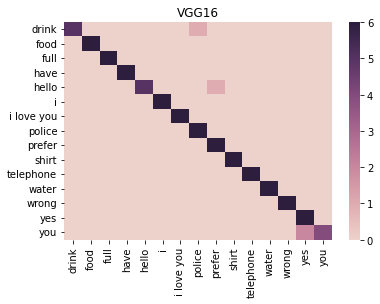

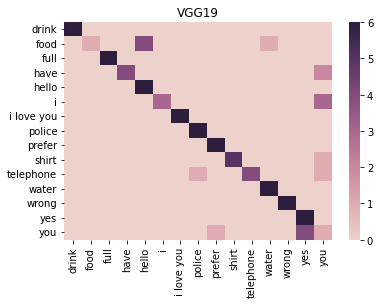

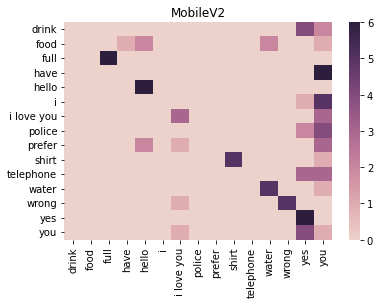

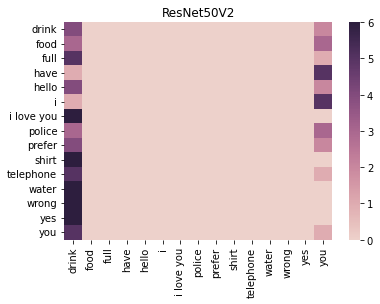

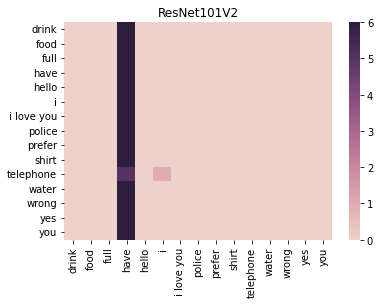

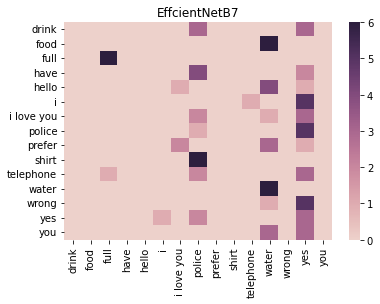

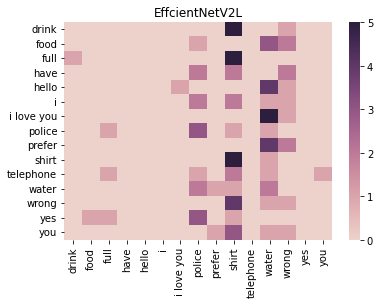

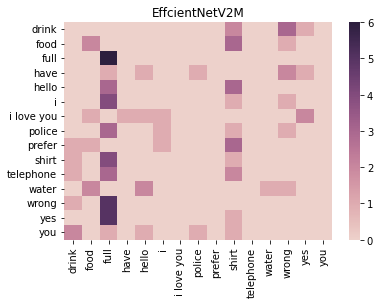

In [ ]:
import pandas as pd
outputss = [out_predicitons0,out_predicitons1,out_predicitons2,out_predicitons3,out_predicitons4,out_predicitons5,\
            out_predicitons6,out_predicitons7]

my_titles = ["VGG16","VGG19","MobileV2","ResNet50V2","ResNet101V2","EffcientNetB7","EffcientNetV2L","EffcientNetV2M"]

for i in range(len(outputss)):
  df = pd.DataFrame(confusion_matrix(myarr, outputss[i]))
  df = df.rename(columns=lambda x: str(dic[x]))
  df = df.rename(index=lambda x: str(dic[x]))
  plt.figure()
  plt.title(my_titles[i])
  sns.heatmap(df,cmap=sns.cubehelix_palette(as_cmap=True))
  plt.show()


Text(0, 0.5, 'F1 Score')

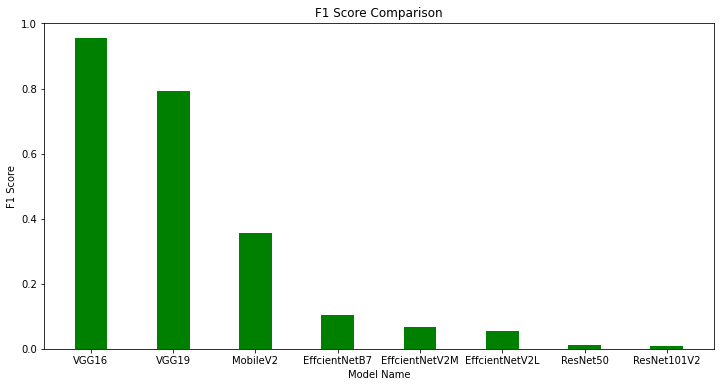

In [ ]:
x = []
y = ["VGG16","VGG19","MobileV2","EffcientNetB7","EffcientNetV2M","EffcientNetV2L","ResNet50","ResNet101V2"]

for i in range(len(outputss)):
  # str(my_titles[i])+" Model Accuracy =\t"+str(accuracy_score(myarr, outputss[i]))
  #print(str(my_titles[i])+" Model F1 Score =\t"+str(f1_score(myarr, outputss[i], average='macro')))

  x.append(f1_score(myarr, outputss[i], average='macro'))

x.sort(reverse=True)
plt.figure(figsize=(12,6)) 
plt.title("F1 Score Comparison")
plt.bar(y,x,0.4,color = "green")
plt.xlabel("Model Name")
plt.ylabel("F1 Score")

Text(0, 0.5, 'Percentage')

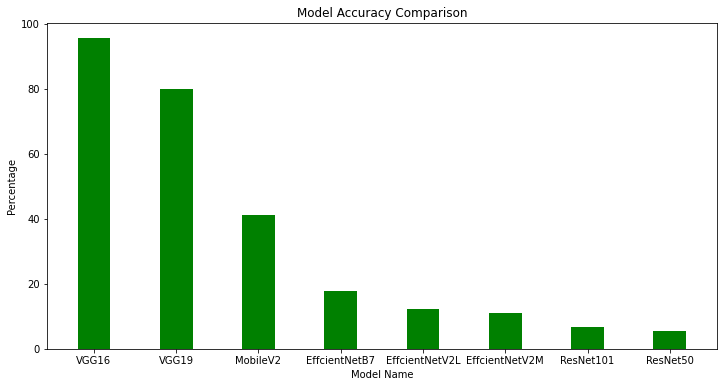

In [ ]:
x = []
y = ["VGG16","VGG19","MobileV2","EffcientNetB7","EffcientNetV2L","EffcientNetV2M","ResNet101","ResNet50"]

for i in range(len(outputss)):
  #print(str(my_titles[i])+" Model Accuracy =\t"+str(accuracy_score(myarr, outputss[i])))
  x.append(accuracy_score(myarr, outputss[i])*100)

x.sort(reverse=True)
plt.figure(figsize=(12,6)) 
plt.title("Model Accuracy Comparison")
plt.bar(y,x,0.4,color = "green")
plt.xlabel("Model Name")
plt.ylabel("Percentage")

Text(0, 0.5, 'Percentage')

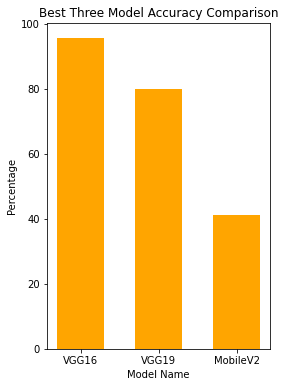

In [ ]:
x = []
y = ["VGG16","VGG19","MobileV2"]

for i in range(3):
  # str(my_titles[i])+" Model Accuracy =\t"+str(accuracy_score(myarr, outputss[i]))
  x.append(accuracy_score(myarr, outputss[i])*100)

plt.figure(figsize=(4,6)) 
plt.title("Best Three Model Accuracy Comparison")
plt.bar(y,x,0.6,color = "orange")
plt.xlabel("Model Name")
plt.ylabel("Percentage")